<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW4Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

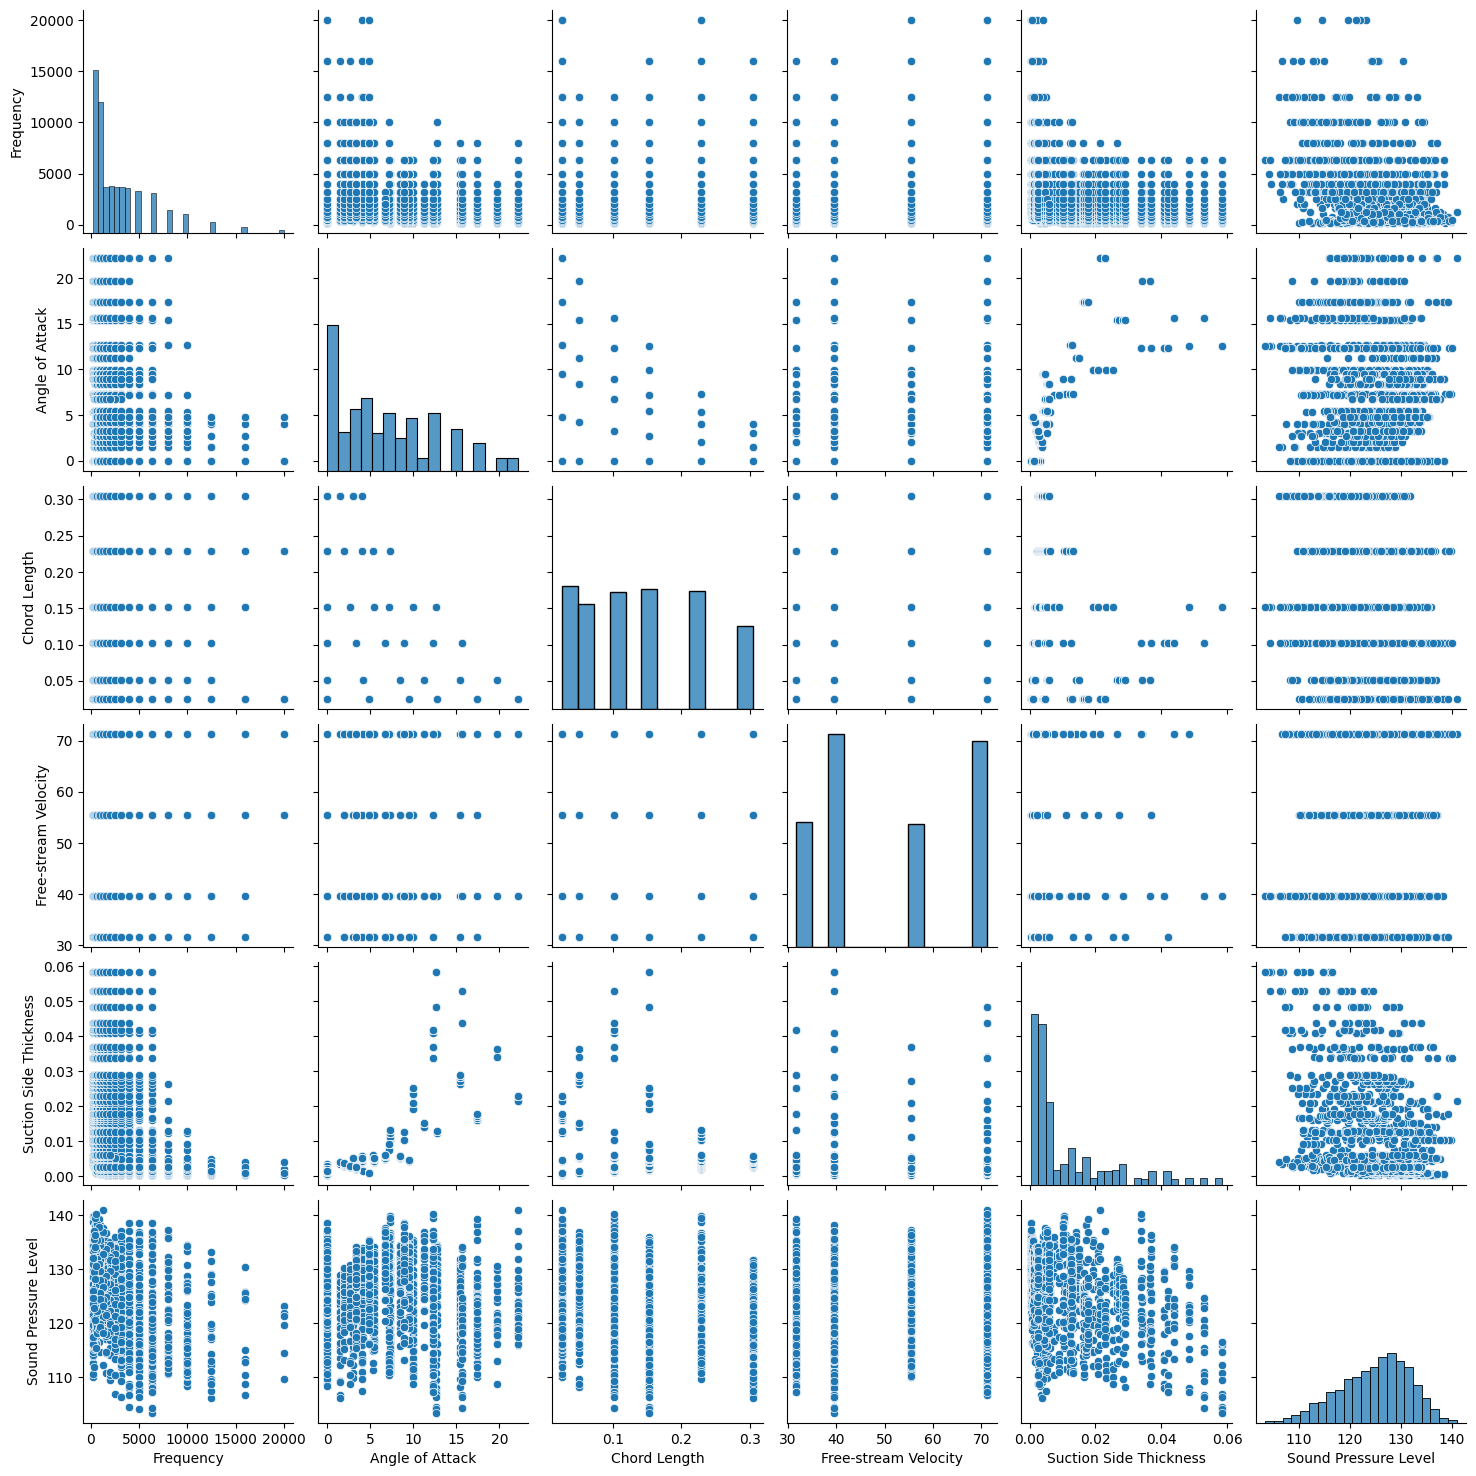

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 15585.4727 - val_loss: 15226.7451
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15167.1240 - val_loss: 14522.1445
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14245.1709 - val_loss: 13131.0146
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12686.8633 - val_loss: 10780.0840
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10061.3418 - val_loss: 7567.2368
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6708.5474 - val_loss: 4275.5796
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3703.2285 - val_loss: 1969.6528
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1633.3910 - val_loss: 953.9573
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 885.4343 - val_loss: 623.7978
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 624.9675 - val_loss: 504.6419
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 541.2899 - val_loss: 446.3968
Epoch

In [1]:
#HW 4 Question 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import urllib.request

# Load NASA Airfoil Self-Noise Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
airfoil_data = pd.read_csv(url, sep='\t', header=None)
airfoil_data.columns = ['Frequency', 'Angle of Attack', 'Chord Length', 'Free-stream Velocity', 'Suction Side Thickness', 'Sound Pressure Level']

# Visualize dataset
sns.pairplot(airfoil_data)
plt.show()

# Split dataset
X = airfoil_data.iloc[:, :-1].values
y = airfoil_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construct Neural Network for Regression
reg_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

reg_model.compile(optimizer='adam', loss='mse')

# Train model
reg_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Predict and Evaluate
y_pred = reg_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r2)